In [1]:
import traci
import sumolib

In [3]:
sumoBinary = "sumo"
sumoCmd = [sumoBinary, "-c", "nt1.sumocfg"]

traci.start(sumoCmd)

TraCIException: Connection 'default' is already active.

In [ ]:
tls_ids = traci.trafficlight.getIDList()
print("Semáforos", tls_ids)

In [ ]:
id_semaforo = tls_ids[0]
programa = traci.trafficlight.getAllProgramLogics(id_semaforo)
print(programa)

In [ ]:
from traci._trafficlight import Logic, Phase

#Crear un nuevo programa con fases personalizadas




new_logic = Logic(programID="nuevo_programa", type=0,currentPhaseIndex=0,phases=[Phase(duration=30, state="GGrr", minDur=30, maxDur=30 ), Phase(duration=5, state='yyrr', minDur=5, maxDur=5), Phase(duration=30, state='rrGG', minDur=30, maxDur=30), Phase(duration=5, state='rryy', minDur=5, maxDur=5), Phase(duration=1, state='rrrr', minDur=1.0, maxDur=1.0)])

#Aplicar el nuevo programa al semáforo
traci.trafficlight.setProgramLogic(id_semaforo, new_logic)


traci.trafficlight.setProgram(id_semaforo, "nuevo_programa")

In [1]:
def new_logic(ggrr, yyrr, rrgg, rryy):

    tls_ids = traci.trafficlight.getIDList()
    id_semaforo = tls_ids[0]
    programa = traci.trafficlight.getAllProgramLogics(id_semaforo)
    
    from traci._trafficlight import Logic, Phase

    new_logic = Logic(programID="nuevo_programa", type=0,currentPhaseIndex=0,phases=[Phase(duration=ggrr, state="GGrr", minDur=ggrr, maxDur=ggrr ), Phase(duration=yyrr, state='yyrr', minDur=yyrr, maxDur=yyrr), Phase(duration=rrgg, state='rrGG', minDur=rrgg, maxDur=rrgg), Phase(duration=rryy, state='rryy', minDur=rryy, maxDur=rryy)])

    traci.trafficlight.setProgramLogic(id_semaforo, new_logic)

    traci.trafficlight.setProgram(id_semaforo, "nuevo_programa")

    print(traci.trafficlight.getCompleteRedYellowGreenDefinition(id_semaforo))


In [2]:
def n_vehiculos(n0, n1):

    for i in range(n0):
        traci.vehicle.add(
            vehID=f"veh_r0_{i}",
            routeID="r_0", # Asegúrate de tener un tipo definido (por defecto puedes omitir esto si usas default)
            depart=i*(3600/(n0+1))
        )

    for i in range(n1):
        traci.vehicle.add(
            vehID=f"veh_r1_{i}",
            routeID="r_1",
            depart=i*(3600/(n1+1))
        )

In [11]:
def avg_time():
    depart_times = {}
    arrival_times = {}
    simulation_durations = {}

    for step in range(3600):
        traci.simulationStep()

        departed_vehicles = traci.simulation.getDepartedIDList()
        current_time = traci.simulation.getTime()
        for veh_id in departed_vehicles:
            if veh_id not in depart_times:
                depart_times[veh_id] = current_time
        
        

        arrived_vehicles = traci.simulation.getArrivedIDList()
        current_time = traci.simulation.getTime()
        for veh_id in arrived_vehicles:
            if veh_id not in arrival_times:
                arrival_times[veh_id] = current_time



    for veh_id, arrival_time in arrival_times.items():
        if veh_id in depart_times:
            departure_time = depart_times[veh_id]
            duration = arrival_time - departure_time
            simulation_durations[veh_id] = duration

    average = sum(simulation_durations.values())/len(simulation_durations)

    return average

In [9]:
#Se importan algunos de los paquetes requeridos
import random as rd
import pandas as pd
import traci
import sumolib

avgtimes=[]#tiempos promedio
ggrrs = []#(verde Norte-Sur)
yyrrs = []#(amarillo Norte-Sur)
rrggs = []# (verde Este-Oeste)
rryys = []#(amarillo Este-Oeste)
n0s = []#Tiempos ruta 0
n1s = []#Tiempos ruta 1
num_simulations = 50


for i in range(num_simulations):

    n0 = rd.randint(1000,5000)
    n1 = rd.randint(1000,5000)

    n0s.append(n0)
    n1s.append(n1)

    sumoBinary = "sumo"
    sumoCmd = [sumoBinary, "-c", "nt1.sumocfg"]

    traci.start(sumoCmd)

    n_vehiculos(n0, n0)

    ggrr = rd.uniform(10,60) #(verde Norte-Sur) 
    yyrr = rd.uniform(2,5) #(amarillo Norte-Sur)
    rrgg = rd.uniform(10,60) # (verde Este-Oeste)
    rryy = rd.uniform(2,5) #(amarillo Este-Oeste)

    ggrrs.append(ggrr)
    yyrrs.append(yyrr)
    rrggs.append(rrgg)
    rryys.append(rryy)

    new_logic(ggrr, yyrr, rrgg, rryy)
    depart_times = {}
    arrival_times = {}
    simulation_durations = {}

    for step in range(3600):
        traci.simulationStep()

        departed_vehicles = traci.simulation.getDepartedIDList()
        current_time = traci.simulation.getTime()
        for veh_id in departed_vehicles:
            if veh_id not in depart_times:
                depart_times[veh_id] = current_time
        
        

        arrived_vehicles = traci.simulation.getArrivedIDList()
        current_time = traci.simulation.getTime()
        for veh_id in arrived_vehicles:
            if veh_id not in arrival_times:
                arrival_times[veh_id] = current_time



    for veh_id, arrival_time in arrival_times.items():
        if veh_id in depart_times:
            departure_time = depart_times[veh_id]
            duration = arrival_time - departure_time
            simulation_durations[veh_id] = duration

    average = sum(simulation_durations.values())/len(simulation_durations)

    avgtimes.append(average)

    traci.close()
data = {
    'Simulation' : range(1, num_simulations + 1),
    'Tiempo promedio' : avgtimes,
    'GGrr (s)' : ggrrs,
    'yyrr (s)' : yyrrs,
    'rrGG (s)' : rrggs,
    'rryy (s)' : rryys,
    'Autos r_0': n0s,
    'Autos r_1': n1s
}

df = pd.DataFrame(data)
df

C:\Users\emman\AppData\Local\Temp\ipykernel_16692\193906455.py:15: UserWarning: Call to deprecated function getCompleteRedYellowGreenDefinition, use getAllProgramLogics instead.
  print(traci.trafficlight.getCompleteRedYellowGreenDefinition(id_semaforo))


(Logic(programID='0', type=0, currentPhaseIndex=0, phases=(Phase(duration=15.0, state='GGrr', minDur=15.0, maxDur=15.0), Phase(duration=3.0, state='yyrr', minDur=3.0, maxDur=3.0), Phase(duration=15.0, state='rrGG', minDur=15.0, maxDur=15.0), Phase(duration=3.0, state='rryy', minDur=3.0, maxDur=3.0)), subParameter={}), Logic(programID='nuevo_programa', type=0, currentPhaseIndex=0, phases=(Phase(duration=25.959, state='GGrr', minDur=25.959, maxDur=25.959), Phase(duration=4.523, state='yyrr', minDur=4.523, maxDur=4.523), Phase(duration=46.255, state='rrGG', minDur=46.255, maxDur=46.255), Phase(duration=3.309, state='rryy', minDur=3.309, maxDur=3.309)), subParameter={}))
(Logic(programID='0', type=0, currentPhaseIndex=0, phases=(Phase(duration=15.0, state='GGrr', minDur=15.0, maxDur=15.0), Phase(duration=3.0, state='yyrr', minDur=3.0, maxDur=3.0), Phase(duration=15.0, state='rrGG', minDur=15.0, maxDur=15.0), Phase(duration=3.0, state='rryy', minDur=3.0, maxDur=3.0)), subParameter={}), Logi

KeyboardInterrupt: 

In [13]:
df.to_csv('Nuevos_valores2.csv', index=False)

In [14]:
df2 = pd.read_csv('Nuevos_valores.csv')
df3 = pd.read_csv('Nuevos_valores2.csv')

df_test = pd.concat([df2, df3], ignore_index=True)

In [15]:
df_test

,Simulation,Tiempo promedio,GGrr (s),yyrr (s),rrGG (s),rryy (s)
0,1,42.273792,54.379963,2.275228,45.521003,2.452633
1,2,47.816987,21.506975,4.334561,10.419554,2.988516
2,3,37.672950,32.006911,3.209169,39.412099,4.236100
3,4,41.208770,41.769052,2.230724,51.537889,3.413446
4,5,44.885861,53.764795,2.604055,58.150533,2.981233
...,...,...,...,...,...,...
120,21,36.594094,29.795930,2.934714,42.411125,2.958799
121,22,38.672269,15.532804,2.468803,35.100084,3.105625
122,23,35.886336,27.340851,3.555902,24.147868,3.140026
123,24,38.795082,30.466068,4.343339,47.943494,2.271605


In [17]:
df_test.to_csv('df_test.csv', index=False)

In [5]:
df['Autos r_0']

0    2884
1    2991
2    3245
3    2550
4    1392
5    3682
6    1639
7    2785
8    4313
9    1052
Name: Autos r_0, dtype: int64

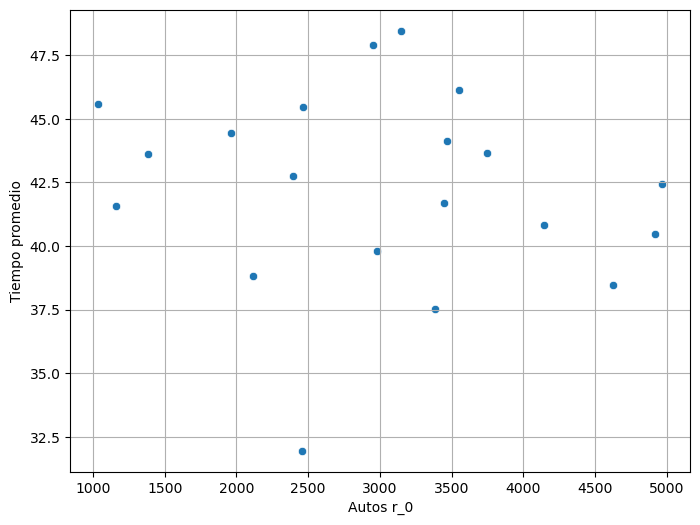

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Autos r_0'], y=df['Tiempo promedio'])
plt.grid(True)
plt.show()